<a href="https://colab.research.google.com/github/SakshiTalreja/Stock-Market-Prediction/blob/main/9_8_21_Maruti_NS_Best_MLalgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import r2_score 
from sklearn.model_selection import KFold 

In [ ]:
df = pd.read_csv('MARUTI.NS.csv')
user_y = input("What you want to predict?\n1. Open\n2. High\n3. Low\n4. Close\n5. RSI(Buy/Sell)\nInput: ")
user_interval = int(input("Number of interval in which you want data to predict: "))
y = df.loc[user_interval:,user_y]
y.index=np.arange(0, len(y))
x = df.drop(['Date', user_y], axis=1).iloc[:-user_interval, :]
# x = x.iloc[:-1, :]
#y = df[['High', 'Low', 'RSI']]
train_accuracy = []
test_accuracy = []
train_rsme = []
test_rsme = []
kfolds = []
kfold_accuracy = []

What you want to predict?
1. Open
2. High
3. Low
4. Close
5. RSI(Buy/Sell)
Input: Low
Number of interval in which you want data to predict: 7


In [ ]:
print(x)

     Sno         Open     High  ...        RSI     SMA Open    SMA Close
0      1  7358.000000  7380.00  ...  37.997501  7373.230013  7344.423340
1      2  7180.000000  7180.00  ...  33.781269  7355.246680  7317.226693
2      3  7050.000000  7132.25  ...  39.625980  7328.913346  7302.396680
3      4  7059.899902  7098.00  ...  41.937710  7314.240006  7291.506673
4      5  7054.000000  7133.00  ...  26.117779  7301.906673  7243.433333
..   ...          ...      ...  ...        ...          ...          ...
614  615  7251.700195  7297.00  ...  23.527954  7478.966667  7437.043359
615  616  7180.000000  7265.00  ...  33.495292  7451.233333  7420.056706
616  617  7302.000000  7325.00  ...  36.650826  7437.666667  7405.633366
617  618  7300.000000  7375.00  ...  30.566525  7424.333333  7386.263379
618  619  7307.000000  7360.00  ...  28.740320  7403.133333  7363.726693

[619 rows x 15 columns]


In [ ]:
def accuracy_score(y_train, y_pred_train, y_test, y_pred_test):
  print("Accuracy in Training: ", r2_score(y_train, y_pred_train)*100)
  train_accuracy.append(r2_score(y_train, y_pred_train)*100)
  print("Accuracy in Testing: ", r2_score(y_test, y_pred_test)*100)
  test_accuracy.append(r2_score(y_test, y_pred_test)*100)

In [ ]:
def rsme(y_train, y_pred_train, y_test, y_pred_test):
  rsme_test = mean_squared_error(y_test, y_pred_test, squared=False)
  rsme_train = mean_squared_error(y_train, y_pred_train, squared=False)
  train_rsme.append(rsme_train)
  test_rsme.append(rsme_test)
  print("RSME Train: ", rsme_train)
  print("RSME Test: ", rsme_test)

In [ ]:
def k_fold(algo, kx, ky, cv):
  kf = KFold(n_splits=cv, random_state=None) 
  kfolds.append(cv)
  scores = []
  model = algo
  for train_index, test_index in kf.split(kx):
    X_train, X_test, Y_train, Y_test = kx.iloc[train_index], kx.iloc[test_index], ky[train_index], ky[test_index]
    model.fit(X_train, np.ravel(Y_train))
    Y_pred_train = model.predict(X_train) 
    scores.append(r2_score(Y_train, Y_pred_train))
  print("Accuracy: {}".format(np.mean(scores)*100)) 
  kfold_accuracy.append(np.mean(scores)*100)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state = 0)

KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
knn_model = KNeighborsRegressor(n_neighbors=7)
knn_model.fit(x_train, y_train)
y_pred_train_knn = knn_model.predict(x_train)
y_pred_test_knn = knn_model.predict(x_test)
accuracy_score(y_train, y_pred_train_knn, y_test, y_pred_test_knn)

Accuracy in Training:  26.490744639047513
Accuracy in Testing:  -5.889059268706309


In [ ]:
rsme(y_train, y_pred_train_knn, y_test, y_pred_test_knn)

RSME Train:  665.7215005027932
RSME Test:  748.0704093915109


In [ ]:
k_fold(KNeighborsRegressor(), x, y, 10) 

Accuracy: 34.602633795512794


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=0, max_depth=10)
rf_model.fit(x_train, y_train)
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)
accuracy_score(y_train, y_pred_train_rf, y_test, y_pred_test_rf)

Accuracy in Training:  98.51973390420463
Accuracy in Testing:  91.16878303704252


In [ ]:
rsme(y_train, y_pred_train_rf, y_test, y_pred_test_rf) 

RSME Train:  94.46946758187134
RSME Test:  216.0365376846685


In [ ]:
k_fold(RandomForestRegressor(), x, y.astype('int'), 10)

Accuracy: 99.1170523428796


SVR

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler().fit_transform(x)
y = np.array(y).reshape(-1, 1)
sc_y = StandardScaler().fit_transform(y) 
x_train_sc, x_test_sc, y_train_sc, y_test_sc = train_test_split(sc_x, sc_y, test_size = 0.3, random_state = 0)

In [ ]:
from sklearn.svm import SVR
svr_model = SVR(kernel='rbf')
svr_model.fit(x_train_sc, y_train_sc[:,0])
y_pred_train_svr = svr_model.predict(x_train_sc)
y_pred_test_svr = svr_model.predict(x_test_sc) 
accuracy_score(y_train_sc, y_pred_train_svr, y_test_sc, y_pred_test_svr)

Accuracy in Training:  90.55244776855777
Accuracy in Testing:  78.09637412182468


In [ ]:
rsme(y_train_sc, y_pred_train_svr, y_test_sc, y_pred_test_svr) 

RSME Train:  0.3123276331002238
RSME Test:  0.4452502020047916


In [ ]:
kf = KFold(n_splits=5, random_state=None) 
kfolds.append(5)
scores = []
model = SVR(kernel='rbf')
for train_index, test_index in kf.split(sc_x):
    X_train, X_test, Y_train, Y_test = sc_x[train_index], sc_x[test_index], sc_y[train_index], sc_y[test_index]
    model.fit(X_train, np.ravel(Y_train))
    Y_pred_train = model.predict(X_train) 
    scores.append(r2_score(Y_train, Y_pred_train))
print("Accuracy: {}".format(np.mean(scores)*100)) 
kfold_accuracy.append(np.mean(scores)*100)

Accuracy: 88.80335421531387


Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr_model = LogisticRegression(solver='liblinear')
lgr_model.fit(x_train, y_train.astype('int'))
y_pred_train_lgr = lgr_model.predict(x_train)
y_pred_test_lgr = lgr_model.predict(x_test)
accuracy_score(y_train.astype('int'), y_pred_train_lgr, y_test.astype('int'), y_pred_test_lgr)

Accuracy in Training:  85.19941847580381
Accuracy in Testing:  29.059907325290467


In [ ]:
rsme(y_train.astype('int'), y_pred_train_lgr, y_test.astype('int'), y_pred_test_lgr)

RSME Train:  298.71588531339967
RSME Test:  612.2929274720213


In [ ]:
k_fold(LogisticRegression(solver='liblinear'), x, y.astype('int'), 5)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Accuracy: 84.12214934158972


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Multiple Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred_train_lr = lr_model.predict(x_train)
y_pred_test_lr = lr_model.predict(x_test)
accuracy_score(y_train, y_pred_train_lr, y_test, y_pred_test_lr)

Accuracy in Training:  81.68143915512653
Accuracy in Testing:  80.01873172437543


In [ ]:
rsme(y_train, y_pred_train_lr, y_test, y_pred_test_lr)

RSME Train:  332.32823983935526
RSME Test:  324.95891543711707


In [ ]:
k_fold(LinearRegression(), x, y, 10)

Accuracy: 81.70121581333748


Analysis

In [ ]:
df_algo = pd.DataFrame({'Algorithm': ['KNN', 'Random Forest', 'SVR', 'Logistic', 'Multiple Linear'], 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Train RMSE': train_rsme, 'Test RMSE': test_rsme, 'KFold': kfolds, 'Kfold Accuracy': kfold_accuracy})
df_algo.set_index('Algorithm', inplace=True)
print(df_algo)

                 Train Accuracy  Test Accuracy  ...  KFold  Kfold Accuracy
Algorithm                                       ...                       
KNN                   26.490745      -5.889059  ...     10       34.602634
Random Forest         98.519734      91.168783  ...     10       99.117052
SVR                   90.552448      78.096374  ...      5       88.803354
Logistic              85.199418      29.059907  ...      5       84.122149
Multiple Linear       81.681439      80.018732  ...     10       81.701216

[5 rows x 6 columns]


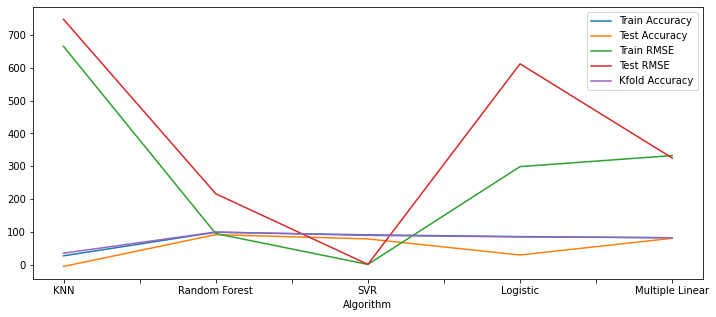

In [ ]:
df_algo[['Train Accuracy', 'Test Accuracy', 'Train RMSE', 'Test RMSE', 'Kfold Accuracy']].plot(subplots=False,figsize=(12,5))

In [ ]:
df_model_best = df_algo.loc[((df_algo['Test Accuracy']>75) & (df_algo['Train Accuracy']>80)), ['Train Accuracy', 'Test Accuracy', 'Kfold Accuracy']]
print(df_model_best)

                 Train Accuracy  Test Accuracy  Kfold Accuracy
Algorithm                                                     
Random Forest         98.519734      91.168783       99.117052
SVR                   90.552448      78.096374       88.803354
Multiple Linear       81.681439      80.018732       81.701216


In [ ]:
interval = int(input("Number of interval in which you want data to predict: "))
df_new = pd.DataFrame(columns=df.columns)
for i in range(0, len(df), interval):
  df_new = df_new.append(df.iloc[i,:], ignore_index=True)
print(df_new)

# save H5 file

Number of interval in which you want data to predict: 7
    Sno        Date         Open  ...        RSI     SMA Open    SMA Close
0     1  21-01-2019  7358.000000  ...  37.997501  7373.230013  7344.423340
1     8  30-01-2019  6559.000000  ...  13.409803  7128.640006  7062.886686
2    15  08-02-2019  7270.000000  ...  43.809150  6937.893327  6917.889974
3    22  20-02-2019  6842.000000  ...  61.482660  6962.853353  6975.919954
4    29  01-03-2019  6876.799805  ...  33.763482  6979.836686  6946.389941
..  ...         ...          ...  ...        ...          ...          ...
85  596  22-06-2021  6940.000000  ...  57.951175  7147.743359  7162.423340
86  603  01-07-2021  7500.000000  ...  64.185053  7280.026660  7304.623340
87  610  12-07-2021  7500.000000  ...  71.750087  7478.646647  7499.550065
88  617  22-07-2021  7302.000000  ...  36.650826  7437.666667  7405.633366
89  624  02-08-2021  7100.000000  ...  30.899834  7282.533333  7234.576660

[90 rows x 17 columns]


In [ ]:
y_predict=rf_model.predict([df.drop(['Date', user_y], axis=1).iloc[-1, :].to_numpy()])
print(y_predict)

[7200.13022443]
